# **<p align="center"><font size=5 color=#006600>Diplomado en Ciencia de Datos**

# **<p align="center"><font size=5 color=#006600>Análisis de correspondencias múltiples (ACM)**

# **<font size=5 color=#0000FF>Profesores**

1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
2. Alvaro Mauricio Montenegro Díaz,ammontenegrod@unal.edu.co 
3. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
4. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com

# **<font size=5 color=#0000FF>Estudiantes auxiliares**

* Jessica López Mejía, jelopezme@unal.edu.co
* Camilo Chitivo, cchitivo@unal.edu.co
* Daniel Andrés Rojas, anrojasor@unal.edu.co

# **<font size=5 color=#0000FF>Asesora medios y marketing digital**

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

# Contenido

* [Objetivos del ACM](#Objetivos-del-ACM)
* [Ejemplo "de juguete", notación y transformaciones de la tabla de datos](#Ejemplo-"de-juguete",-notación-y-transformaciones-de-la-tabla-de-datos)
* [El ACM como un ACS de la TDC](#El-ACM-como-un-ACS-de-la-TDC)
* [El ACM como un ACP(**X,M,N**) de la TDC](#El-ACM-como-un-ACP(X,M,N)-de-la-TDC)
* [Elementos suplementarios](#Elementos-suplementarios)
* [Ejemplo de aplicación: ACM de consumo cultural en  niños de 8 a 11 años en Colombia](#Ejemplo-de-aplicación:-ACM-de-consumo-cultural-en-niños-de-8-a-11-años-en-Colombia)

Fuente: Pardo C. E. (2023). Estadística descriptiva multivariada. Universidad Nacional de Colombia Sede Bogotá. Facultad de Ciencias. 
[PDF](https://drive.google.com/file/d/1ET1TOfhgUiMNyzrcEc2ZEBjKwAXb5ZJK/view?usp=drive_link)

# **Objetivos del ACM**

- Describir las asociaciones entre las categorías de las variables activas. 
- Descubrir patrones de individuos, que pueden dar origen a grupos de ellos.
- Sintetizar en imágenes geométricas (planos factoriales) las asociaciones entre categorías y los posibles grupos de individuos.
- Explorar la explicación de la estructura inducida por las categorías activas, con variables que juegan el papel de ilustrativas.

Adicionalmente:

- Cuantificar las variables cualitativas.  
- Reducir de dimensión.
- Filtrar: conservar la información y eliminar el ruido.

El ACM es una extensión del ACS con propiedades muy particulares. 


[Volver al inicio](#Contenido)

## Ejemplo "de juguete", notación y transformaciones de la tabla de datos

#### Ejemplo: descripción de admitidos según algunas variables sociodemográficas,  notación y transformaciones de datos

- Descripción de los 445 admitidos a la Facultad de Ciencias, para el semestre de 2013-I.
- Datos disponibles en *admi{FactoClass}*
- Se utilizan como variables activas las sociodemográficas disponibles: 
    - Género: Femenino, Masculino
    - Edad: 16 o menos, 17, 18, 19 o más
    - Estrato: bajo, medio, alto
    - Procedencia: Bogotá, Cundinamarca, Otro
    
### Notación

- La tabla de datos se denomina *de código condensado* (denotada por **Y** y no tiene significado numérico). 
- Las $n$ filas representan a los individuos y 
- las $s$ columnas a las variables cualitativas. 
- En el lenguaje de diseño de experimentos las columnas son factores
- Las categorías son los niveles de los factores. 
- En R estas variables son de tipo factor.

## Tabla de datos del ejemplo Admitidos

In [1]:
rm(list=ls())
library(FactoClass) # carga el paquete

Loading required package: ade4

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



### Tabla de datos **Y**

In [2]:
data(admi)
Y<-admi[,8:11] #tomamos las columnas genero, estrato, origen y edad

In [3]:
# estracto de la tabla: múltiplo de 25
sel<-seq(25,425,25)
cat("\nDimensión de Y:",dim(Y)[1],"x",dim(Y)[2])
Y[sel,]


Dimensión de Y: 445 x 4

,gene,estr,orig,edad
,<fct>,<fct>,<fct>,<fct>
25,F,medio,Otro,a17
50,M,bajo,Bogo,a18
75,M,bajo,Bogo,a17
100,M,medio,Bogo,a18
125,F,medio,Otro,a17
150,F,bajo,Bogo,a16m
175,M,alto,Bogo,a19M
200,F,bajo,Otro,a17
225,M,alto,Otro,a16m


[Volver al inicio](#Contenido)

### Tabla disyuntiva completa (TDC): **Z** 

La tabla **Y** no tiene sentido numérico y, por lo tanto, las cuatro particiones de los admitidos se escriben como tablas indicadoras con tantas columnas como categorías. La tabla **Z** es una contatenación de esas tablas. Su nombra se deriva de las características de las subtablas porque un partición es una unión de  subconjutos disyuntos.

In [4]:
Z<-acm.disjonctif(Y) #función de ade4
cat("\nDimensión de Z:",dim(Z))
names(Z)<-substr(names(Z),6,8)
Z[sel,] #sel<-seq(25,425,25)


Dimensión de Z: 445 12

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,1,0,0,1,0,0,0,1,0,1,0,0
50,0,1,1,0,0,1,0,0,0,0,1,0
75,0,1,1,0,0,1,0,0,0,1,0,0
100,0,1,0,1,0,1,0,0,0,0,1,0
125,1,0,0,1,0,0,0,1,0,1,0,0
150,1,0,1,0,0,1,0,0,1,0,0,0
175,0,1,0,0,1,1,0,0,0,0,0,1
200,1,0,1,0,0,0,0,1,0,1,0,0
225,0,1,0,0,1,0,0,1,1,0,0,0


In [5]:
cat("\nExtracto de 4 filas de las tablas Y y Z para ver la recodiificación")
Y[sel[1:4],]
Z[sel[1:4],]


Extracto de 4 filas de las tablas Y y Z para ver la recodiificación

,gene,estr,orig,edad
,<fct>,<fct>,<fct>,<fct>
25,F,medio,Otro,a17
50,M,bajo,Bogo,a18
75,M,bajo,Bogo,a17
100,M,medio,Bogo,a18


,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,1,0,0,1,0,0,0,1,0,1,0,0
50,0,1,1,0,0,1,0,0,0,0,1,0
75,0,1,1,0,0,1,0,0,0,1,0,0
100,0,1,0,1,0,1,0,0,0,0,1,0


La TDC **Z** es una yuxtaposición de *s* tablas, donde *s* es el número de variables:

$$\mathbf{Z}=[\mathbf{Z}_1 \ \mathbf{Z}_2 \ \cdots \mathbf{Z}_q \ \cdots \ \mathbf{Z}_s]$$

- Una variable cualitativa $q$  $\rightarrow$ Genera partición  de los $n$ individuos en $p_q$ grupos,  $p_q$ = número de categorías de la variable $q$ 
- En cada fila de $\mathbf{Z}_q$ siempre hay un 1 y sólo un 1. 
- La suma en cada fila de $\mathbf{Z}_q$  es de 1. 
- Como hay $s$ submatrices $\mathbf{Z}_q$, la suma de cada fila de $\mathbf{Z}$ es $s$, es decir que su marginal fila es un vector de $n$ veces $s$ 
- El total de **Z** es $ns$. 
- En el ejemplo $s=4$,  $n=445$ y el total de la tabla $4*445=1780$.
- La suma de cada columna de **Z** es el número de individuos que asumen la categoría $j$ que se denota $n_j$
- La $\sum\limits_{j \in Z_q} n_j = n$  $\quad Z_q$ es el conjunto de categorías de la variable $q$. 


### Tabla de Burt: $\mathbf{B} = \mathbf{Z^T Z}$

In [6]:
Z<-as.matrix(Z)
B<-t(Z)%*%Z
B

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
F,128,0,46,59,23,89,9,30,46,45,18,19
M,0,317,133,126,58,222,29,66,72,126,38,81
baj,46,133,179,0,0,95,22,62,44,58,22,55
med,59,126,0,185,0,151,11,23,47,74,26,38
alt,23,58,0,0,81,65,5,11,27,39,8,7
Bog,89,222,95,151,65,311,0,0,70,116,47,78
Cun,9,29,22,11,5,0,38,0,9,19,2,8
Otr,30,66,62,23,11,0,0,96,39,36,7,14
a16,46,72,44,47,27,70,9,39,118,0,0,0
a17,45,126,58,74,39,116,19,36,0,171,0,0


- **B** es de orden $p\times p$
- Se denota la yuxtaposición de tablas de contingencia cruzando todas las variables por parejas, como:
$$\mathbf{Z'}_q\mathbf{Z}_{q'}$$
- Bloque diagonal con matrices diagonales
 $$\mathbf{Z'}_q\mathbf{Z}_{q} = diag(n_j), \ \ \ j \in J_q$$ 
- La matriz diagonal con los elementos diagonales de  $\mathbf{B}$ = suma de las columnas de **Z**:
$$\mathbf{D}_p = diag(n_j)$$

In [7]:
cat("\nDp: matriz diagonal con elementos de la tabla de BURT (B)")
Dp<-diag(diag(B))
Dp


Dp: matriz diagonal con elementos de la tabla de BURT (B)

128,0,0,0,0,0,0,0,0,0,0,0
0,317,0,0,0,0,0,0,0,0,0,0
0,0,179,0,0,0,0,0,0,0,0,0
0,0,0,185,0,0,0,0,0,0,0,0
0,0,0,0,81,0,0,0,0,0,0,0
0,0,0,0,0,311,0,0,0,0,0,0
0,0,0,0,0,0,38,0,0,0,0,0
0,0,0,0,0,0,0,96,0,0,0,0
0,0,0,0,0,0,0,0,118,0,0,0
0,0,0,0,0,0,0,0,0,171,0,0
0,0,0,0,0,0,0,0,0,0,56,0


# **El ACM como un AC de la TDC**

Considerando que el ACM y otros análisis de correspondencias se derivan del  ACS,  de ahora en adelante  el término análisis de correspondencias simples (ACS), se cambia por análisis de correspondencias (AC) y un AC particular se identifica por la tabla que se analisa. Con esta convinción  ACM es el $AC(\mathbf{Z})$), es decir el AC de la tabla disyuntiva completa (TDC).

Tabla de frecuencias relativas: $$\mathbf{F}=\dfrac{1}{ns}\mathbf{Z}$$
- Marginales fila:  $f_{i\cdot}=\dfrac{1}{n};  \forall i$ 
- Marginales columna:  $f_{\cdot j}=\dfrac{n_j}{ns}; \forall j$
- En el ejemplo: $f_{i\cdot}=\dfrac{1}{445}=0.22\%;  \forall i=1,\cdots,445$ 
- $f_{\cdot j}~=~\dfrac{n_j}{445*4}~=\dfrac{n_j}{1780}; \forall j = 1,\cdots,12$, 
- Por ejemplo  $f_{\cdot 1}~=~\dfrac{128}{1780}=7.19\%$.


In [8]:
n<-nrow(Y) #numero de filas
s<-ncol(Y) #numero de columnas
F<-1/n/s*Z
cat("\nExtracto de 6 columnas de la tabla F")
round(addmargins(head(F[sel,]),2),3)
cat("Sum col",round(colSums(F),3))
cat("\n\nMarginal de cada fila 1/445:",round(1/nrow(Z),5))


Extracto de 6 columnas de la tabla F

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19,Sum
25,0.001,0.000,0.000,0.001,0,0.000,0,0.001,0.000,0.001,0.000,0,0.002
50,0.000,0.001,0.001,0.000,0,0.001,0,0.000,0.000,0.000,0.001,0,0.002
75,0.000,0.001,0.001,0.000,0,0.001,0,0.000,0.000,0.001,0.000,0,0.002
100,0.000,0.001,0.000,0.001,0,0.001,0,0.000,0.000,0.000,0.001,0,0.002
125,0.001,0.000,0.000,0.001,0,0.000,0,0.001,0.000,0.001,0.000,0,0.002
150,0.001,0.000,0.001,0.000,0,0.001,0,0.000,0.001,0.000,0.000,0,0.002


Sum col 0.072 0.178 0.101 0.104 0.046 0.175 0.021 0.054 0.066 0.096 0.031 0.056

Marginal de cada fila 1/445: 0.00225

[Volver al inicio](#Contenido)

## Nube de individuos

Los $n$ individuos conforman la nube $N_n$ en $\mathbb{R}^p$

- Coordenadas: filas de la tabla $\dfrac{1}{s}\mathbf{Z}$:
barras de altura $1/s$ cuando el individuo asume la categoría $j$ y 0 cuando no la asume.
- Peso: $\dfrac{1}{n}$
- Métrica:  $\mathbf{M}=ns \mathbf{D}_p^{-1}, \quad \mathbf{D}_p = diag(n_j)\qquad$,término general:
$m_j = \dfrac{ns}{n_j}$
- En el ejemplo: un perfil fila es ${\dfrac{1}{4} z_{ij}; j=1,\cdots,12}$, 
- con peso 0.225\%. 
- Extracto de algunos perfiles 

In [9]:
head(1/4*Z[sel,],4)

,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
25,0.25,0.00,0.00,0.25,0,0.00,0,0.25,0,0.25,0.00,0
50,0.00,0.25,0.25,0.00,0,0.25,0,0.00,0,0.00,0.25,0
75,0.00,0.25,0.25,0.00,0,0.25,0,0.00,0,0.25,0.00,0
100,0.00,0.25,0.00,0.25,0,0.25,0,0.00,0,0.00,0.25,0


Cada perfil fila tiene barras de altura 0.25 cuando el admitido asume la categoría.
Sigue siendo un indicador de presencia/ausencia de las categorías.

- La métrica en este espacio de los individuos tiene término general $m_j = \dfrac{1780}{n_j}$.


In [10]:
cat("\nDiagonal de la matriz de métrica\n\n")
nj = n*s*1/diag(Dp)
names(nj)=colnames(Z)
t(data.frame(metrica=round(nj,1)))


Diagonal de la matriz de métrica



,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
metrica,13.9,5.6,9.9,9.6,22,5.7,46.8,18.5,15.1,10.4,31.8,17.8


## Centro de gravedad
- La coordenada $j$ del centro de gravedad $g_p$ es $\dfrac{1}{n}\sum\limits_{i=1} ^n \dfrac{1}{s} z_{ij}=\dfrac{n_j}{ns} $, que es la marginal columna de $\mathbf{F}=\dfrac{1}{ns}\mathbf{Z}$.

In [11]:
cat("\nCentro de gravedad en porcentaje\n\n")
t(round(data.frame(centroide=colSums(1/n/s*Z)*100),1))


Centro de gravedad en porcentaje



,F,M,baj,med,alt,Bog,Cun,Otr,a16,a17,a18,a19
centroide,7.2,17.8,10.1,10.4,4.6,17.5,2.1,5.4,6.6,9.6,3.1,5.6


## Distancia entre individuos 
$$
d^2(i,l)=ns\sum_{j=1}^p \frac{1}{n_j} \left(\dfrac{1}{s}\left[ z_{ij}-z_{lj} \right] \right)^2=
\frac{n}{s} \sum_{j=1}^p \frac{1}{n_j} \left(z_{ij}-z_{lj} \right)^2 
$$

- Si dos individuos se parecen = asumen más o menos las mismas categorías. 
- La distancia se amplifica más cuando uno solo de los dos individuos asume una categoría de baja frecuencia.
- Por ejemplo la distancia al cuadrado entre los  individuos 50 y 100  es $d^2(i50,i100)= \dfrac{445}{4}\left(\dfrac{1}{179}+\dfrac{1}{185}\right)=1.22$ y la diferencia entre ellos en estrato bajo y medio:


In [12]:
Y[c(50,100),]

,gene,estr,orig,edad
,<fct>,<fct>,<fct>,<fct>
50,M,bajo,Bogo,a18
100,M,medio,Bogo,a18


## Inercia de la nube de perfiles fila

$$
\dfrac{1}{n} \sum\limits_{i=1}^n d^2(i,\mathbf{g}_p) = 
\dfrac{1}{n} \sum\limits_{i=1}^n \sum\limits_{j=1}^p \dfrac{ns}{n_j}(\dfrac{z_{ij}}{s}-\dfrac{n_j}{ns})^2= 
\dfrac{1}{s} \sum\limits_{j=1}^p \dfrac{1}{n_j} \sum\limits_{i=1}^n (z_{ij}^2 -2 z_{ij} \dfrac{n_j}{n} + \dfrac{n_j^2}{n^2}) =
$$
$$
\dfrac{1}{s} (p -  2 s  + s) = \dfrac{p}{s} - 1
$$

- La inercia de la nube de puntos depende del cociente entre el número de categorías y el número de variables, no de los valores internos de la tabla, por lo tanto no tiene significado estadístico.
- En el ejemplo es $12/4 -1 = 2$.


## Ejes y subespacios vectoriales

$$ 
AC(Z) = ACP\left(\dfrac{1}{s}\mathbf{Z},ns\mathbf{D}_p^{-1},\dfrac{1}{n}\mathbf{I}_n\right)
$$

- La matriz de inercia es: 
$$
\dfrac{1}{s}\mathbf{Z'}\dfrac{1}{n}\mathbf{I}_n\dfrac{1}{s}\mathbf{Z}ns\mathbf{D}_p^{-1}=
\dfrac{1}{s}\mathbf{Z'Z}\mathbf{D}_p^{-1}=
\dfrac{1}{s}\mathbf{B}\mathbf{D}_p^{-1}
$$

- El rango de esta matriz es igual al rango de **Z**, que es $p-s$, porque por cada variable hay una columna que es linealmente dependiente, 
- Una columna se puede obtener como la diferencia entre el vector de $n$ unos y la suma de las demás columnas asociadas a la variable.  
- La nube de puntos está soportada en un subespacio de dimensión $p-s$, que es el número de valores propios mayores que cero. 
- En el ejemplo hay $12-4=8$ valores propios mayores que cero,

[Volver al inicio](#Contenido)

## Valores propios del ACM de admitidos

Inertia information:
Call: inertia.dudi(x = acm)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1  0.3366  0.3366   16.83
Ax2  0.3128  0.6493   32.47
Ax3  0.2827  0.9320   46.60
Ax4  0.2471  1.1791   58.96
Ax5  0.2408  1.4199   71.00
Ax6  0.2293  1.6493   82.46
Ax7  0.2075  1.8568   92.84
Ax8  0.1432  2.0000  100.00

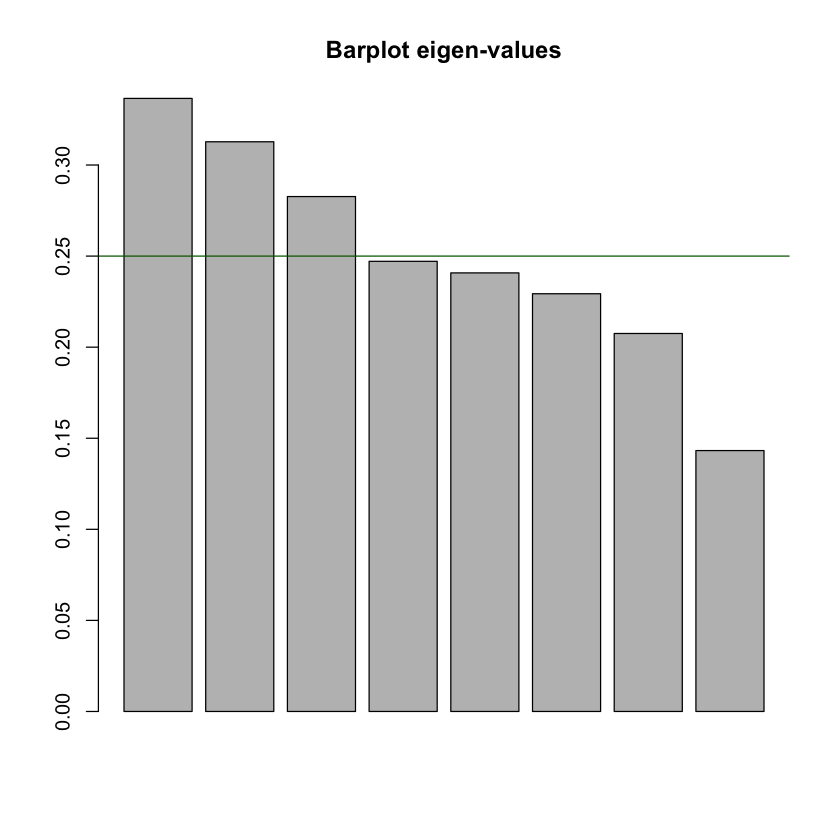

In [13]:
acm<-dudi.acm(Y,scannf=FALSE,nf=3)
inertia(acm)
barplot(acm$eig,main="Barplot eigen-values")
abline(h=sum(acm$eig)/8,col="darkgreen")

## Primer plano factorial del ACM de admitidos

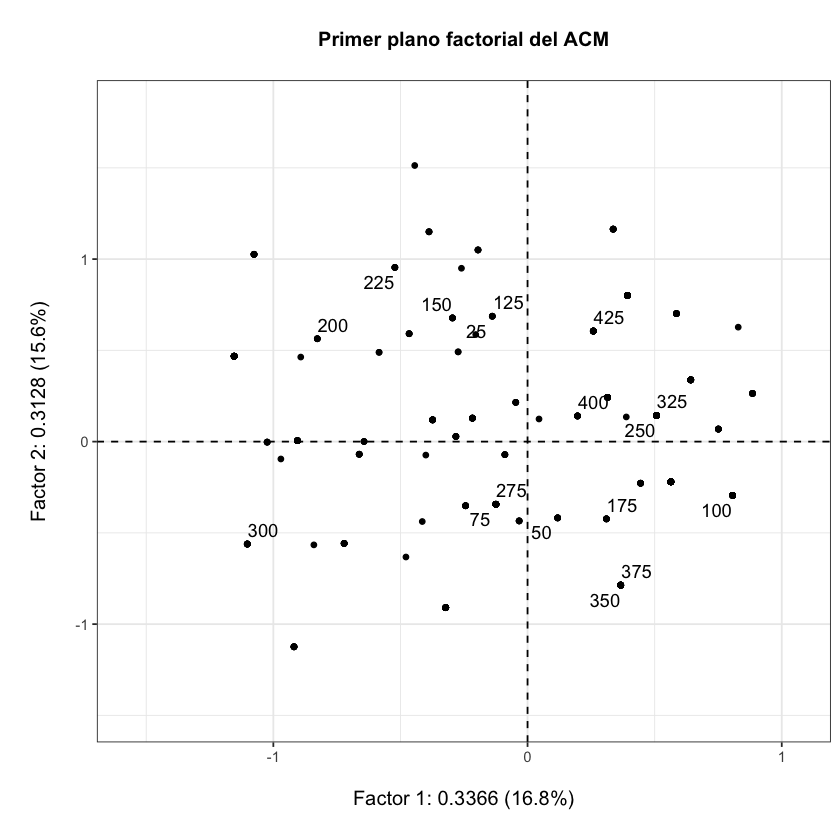

In [14]:
plot(acm,Tcol=FALSE,gg=TRUE,roweti=sel,main="Primer plano factorial del ACM")

# Nube de categorías

### Coordenadas: Columnas de la tabla $\mathbf{ZD}^{-1}_p$

- Cada perfil columna $j$ tiene solo dos alturas: cero o $1/n_j$. 
- Las alturas son en general, diferentes en cada perfil. 
- El peso de cada categoría es $\dfrac{n_j}{ns}$

### Centro de gravedad: Es el vector de $n$ valores $\dfrac{1}{n}$

- Coordenada $i$ del centro de gravedad: 
$$ \mathbf{g}(i)  = \sum_{j=1}^p \frac{n_j}{ns} \frac{z_{ij}}{n_j} =
     \sum_{j=1}^p \frac{1}{ns} z_{ij} = \frac{1}{ns} s = \frac{1}{n}
     $$

### Métrica: $n \mathbf{I}_n$

### Distancia entre dos categorías

$$
d^2(j,k) = \sum_{i=1}^n n \left(\frac{z_{ij}}{n_j} - \frac{z_{ik}}{n_k}\right)^2
$$

**Interpretación de la distancia entre categorías**


                       Categoría k  
               
                     |   1  |  0   | suma
                     --------------------  
      Categoria   1  |   a  |  b   | n_j

         j        0  |   c  |  d   | c+d
                     -------------------- 
              suma   |  n_k | b+d  |  n
              
$$
d^2(j,k) = n \left(  \frac{n_k + n_j - 2a}{n_j n_k} \right) = 
n \left( \frac{a+c+a+b - 2a}{n_j n_k} \right) = \frac{n}{n_j n_k} (b+c)
$$              

- En la distancia de dos categorías, sólo se suman los individuos que asumen una y solo una de las dos categorías. 
- Las categorías de baja frecuencia se alejan más de las demás.

### Contribución de categorías y variables a la inercia 

- Distancia entre la categoría $j$ y el centro de gravedad $\mathbf{g}_n=\dfrac{1}{n}\mathbf{1}_n$:

$$
d^2(j,\mathbf{g}_n) = n \sum_{i=1}^{n} \left( \frac{z_{ij}}{n_j} - \frac{1}{n} \right)^2 =
n \sum_{i=1}^n \left(\frac{z_{ij}^2}{n_j^2}-2 \frac{z_{ij}}{n_j} \frac{1}{n} + \frac{1}{n^2}\right)=
  \frac{n}{n_j} - 1
$$

-  Las categorías de menos frecuencia son las más alejadas del origen

$$
I(N_p) =\sum_{q=1}^s \sum_{j \in J_q} \frac{n_j}{ns} d^2(j,\mathbf{g}_n) = 
\sum_{q=1}^s \sum_{j \in J_q}  \frac{n_j}{ns} \left(\frac{n}{n_j}-1\right) =
\sum_{q=1}^s \sum_{j \in J_q}  \frac{1}{s} \left(1-\frac{n_j}{n}\right) 
$$

- $J_q$ es el conjunto de categorías que pertenecen la variable $q$. 


**Contribuciones a la inercia**

- De una categoría $j$: $ \dfrac{1}{s}\left(1-\dfrac{n_j}{n}\right) $, contribuyen más las categorías de baja frecuencia.
- De una variable $q$: $\sum\limits_{j \in J_q}  \dfrac{1}{s} \left(1-\dfrac{n_j}{n}\right) = 
\dfrac{1}{s}\left(p_q-\dfrac{n}{n}\right) = \dfrac{1}{s}\left(p_q-1\right)$,  contribuyen más las variables con más categorías
- Inercia total: $\sum\limits_{q=1}^s  \dfrac{1}{s}\left(p_q-1\right) = \dfrac{1}{s}(p-s) =\dfrac{p}{s}-1$. No tiene significado estadístico,  no depende de los valores de la tabla sino de la relación entre número de categorías y número de variables.


## Subespacio de proyección de las categorías

### Primer plano factorial

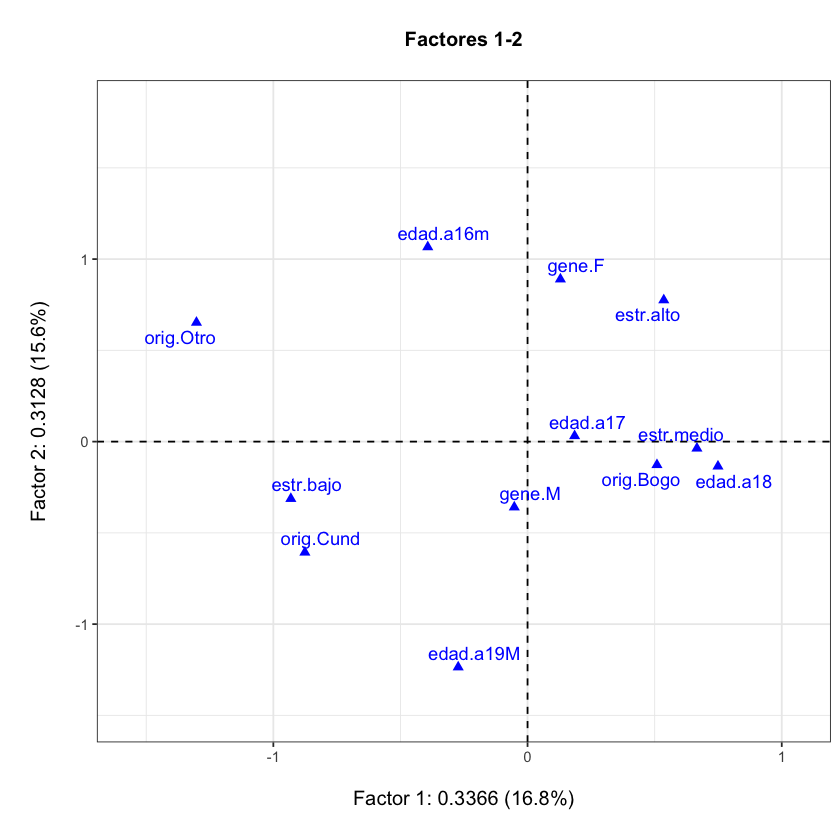

In [15]:
plot(acm,Trow=FALSE,gg=TRUE,main="Factores 1-2")

### Coordenadas y ayudas para la interpretación de las categorías para los tres primeros ejes

In [16]:
ayuacm<-inertia(acm,,T)
names(ayuacm)
round(cbind(acm$co,ayuacm$col.abs,ayuacm$col.rel,ayuacm$col.contrib),2)
round(sum(acm$eig)/12*100,2)

[1] "tot.inertia" "col.contrib" "col.abs"     "col.rel"     "col.cum"    
[6] "nf"          "call"

,Comp1,Comp2,Comp3,Axis1,Axis2,Axis3,Axis1,Axis2,Axis3,ayuacm$col.contrib
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gene.F,0.13,0.89,-0.51,0.36,18.21,6.66,0.67,31.97,-10.58,8.90
gene.M,-0.05,-0.36,0.21,0.14,7.35,2.69,-0.67,-31.97,10.58,3.60
estr.bajo,-0.93,-0.31,-0.18,25.90,3.15,1.17,-58.34,-6.58,-2.21,7.47
estr.medio,0.67,-0.04,-0.31,13.71,0.05,3.61,31.59,-0.10,-6.99,7.30
estr.alto,0.54,0.78,1.12,3.88,8.75,20.06,6.39,13.38,27.73,10.22
orig.Bogo,0.51,-0.13,-0.11,13.45,0.91,0.70,60.15,-3.76,-2.65,3.76
orig.Cund,-0.88,-0.61,1.44,4.87,2.51,15.72,-7.16,-3.44,19.43,11.43
orig.Otro,-1.30,0.65,-0.23,27.18,7.34,0.97,-46.66,11.71,-1.39,9.80
edad.a16m,-0.39,1.07,-0.29,3.04,24.09,1.99,-5.56,41.02,-3.07,9.19


[1] 16.67

# **El ACM como un ACP(X,M,N) de la TDC)**

 $$
 ACP(\mathbf{X,M,N})
 $$

- $\mathbf{X}= n \mathbf{I}_n\dfrac{1}{ns}\mathbf{Z} ns \mathbf{D}=n\mathbf{ZD}_p^{-1}$, 
    - término general: $x_{ij}=\dfrac{n}{n_j} z_{ij}$.
- $\mathbf{M}=\dfrac{1}{ns}\mathbf{D}_p$, 
    - término general: $m_j = \dfrac{n_j}{ns}$.
- $\mathbf{N}=\dfrac{1}{n}\mathbf{I}_n$, 
    - término general: $d_i=\dfrac{1}{n}$.

####  **M** - distancia al cuadrado entre dos individuos $i$ y $l$ 
$$
d^2(i,l) =  \sum_{j=1}^p \dfrac{n_j}{ns} \left(\dfrac{n}{n_j} z_{ij}-\dfrac{n}{n_j} z_{lj} \right)^2 
            =  \dfrac{n}{s} \sum_{j=1}^p \dfrac{1}{n_j} (z_{ij} - z_{lj})^2
$$
####  **N** - distancia al cuadrado entre dos categorías
$j$ y $k$ de **X**
$$
d^2(j,k)= \sum_{i=1}^n \frac{1}{n}\left(\dfrac{n}{n_j} z_{ij}-\dfrac{n}{n_k} z_{ik} \right)^2
            = n \sum_{i=1}^n \left(\dfrac{z_{ij}}{n_j} -\dfrac{z_{ik}}{n_k}  \right)^2
$$



[Volver al inicio](#Contenido)

## Relaciones cuasibaricéntricas

#### Coordenada de un individuo en función de  las coordenadas de las categorías


$$
 F_s(i) = \frac{1}{\sqrt{\lambda_s}} \frac{1}{s} \sum_{j=1}^p z_{ij}  G_s(j) 
           = \frac{1}{\sqrt{\lambda_s}} \frac{1}{s} \sum_{j \in J_i}  G_s(j)
$$


- $J_i$ es el conjunto de categorías que son asumidas por el individuo $i$.
- La coordenada sobre un eje $s$ del individuo $i$ se sitúa en el promedio aritmético de las coordenadas de las categorías que asume, dilatadas por el inverso de la raíz cuadrada del valor propio. 

- Ejemplo: el primer individuo de la tabla asume las categorías:

    - Ge.F (0.1) es la coordenada sobre el primer eje, Ed.17 (0.2), Es.medio (0.7) y - Or.Otro (-1.3). 
    - Promedio aritmético: (0.1+0.2+0.7-1.3)/4 = -0.08. 
    - La dilatación es $1/\sqrt{0.337}=1.72$.
    - La coordenada es 1.72*(~-0.08) = -0.14. 


#### Coordenada de una categoría en función de  las coordenadas de los individuos 

$$  
G_s(j) = \frac{1}{\sqrt{\lambda_s}} \frac{1}{n_j} \sum_{i=1}^n  z_{ij}   F_s(i)
$$

- $I_j$ es el conjunto de individuos que asumen la categoría  $j$, 
    - La categoría $j$ se sitúa en el promedio aritmético de las coordenadas de los individuos que la asumen, dilatada por el inverso de la raíz cuadrada del valor propio.


[Volver al inicio](#Contenido)

### Representación simultánea en el primer plano factorial

,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425
gene,F,M,M,M,F,F,M,F,M,M,M,M,M,M,M,F,M
estr,medio,bajo,bajo,medio,medio,bajo,alto,bajo,alto,alto,bajo,bajo,alto,medio,medio,bajo,alto
orig,Otro,Bogo,Bogo,Bogo,Otro,Bogo,Bogo,Otro,Otro,Bogo,Bogo,Otro,Bogo,Bogo,Bogo,Bogo,Bogo
edad,a17,a18,a17,a18,a17,a16m,a19M,a17,a16m,a17,a17,a19M,a17,a19M,a19M,a18,a16m


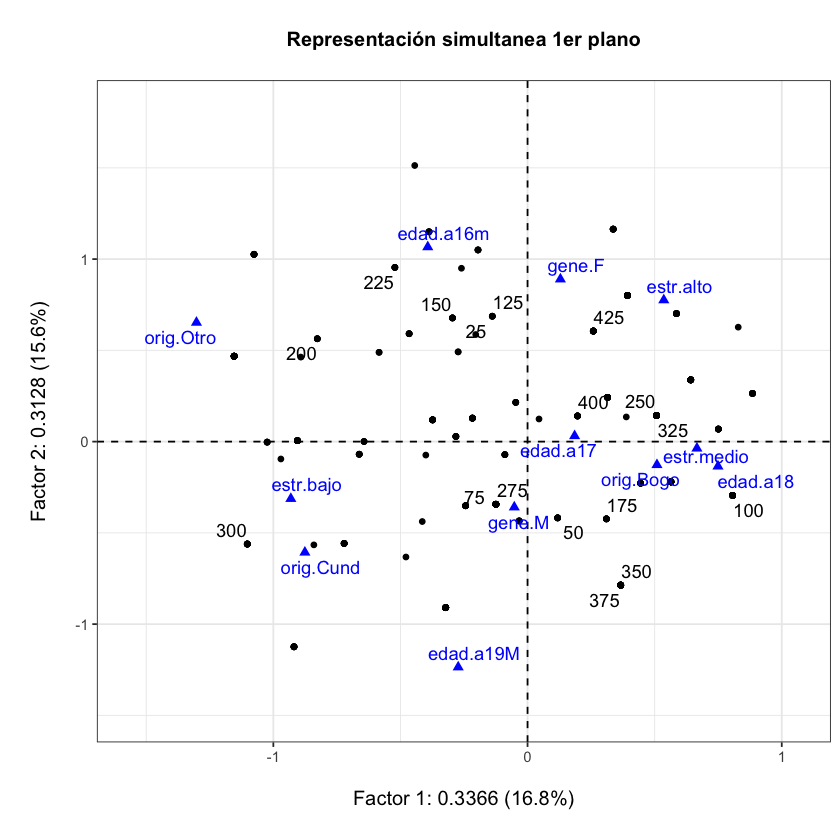

In [17]:
plot(acm,roweti=sel,main="Representación simultanea 1er plano",gg=TRUE)
t(Y[sel,])

### Plano factorial 2-3

,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425
gene,F,M,M,M,F,F,M,F,M,M,M,M,M,M,M,F,M
estr,medio,bajo,bajo,medio,medio,bajo,alto,bajo,alto,alto,bajo,bajo,alto,medio,medio,bajo,alto
orig,Otro,Bogo,Bogo,Bogo,Otro,Bogo,Bogo,Otro,Otro,Bogo,Bogo,Otro,Bogo,Bogo,Bogo,Bogo,Bogo
edad,a17,a18,a17,a18,a17,a16m,a19M,a17,a16m,a17,a17,a19M,a17,a19M,a19M,a18,a16m


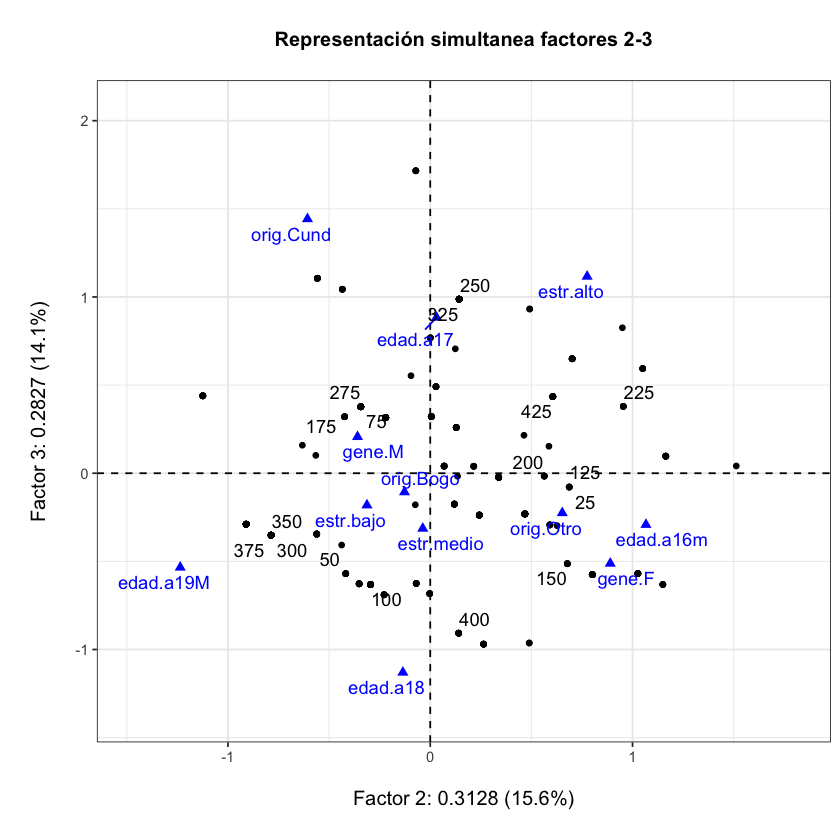

In [18]:
plot(acm,2,3,roweti=sel,main="Representación simultanea factores 2-3",gg=TRUE)
t(Y[sel,])

[Volver al inicio](#Contenido)

### Razones de correlación sobre un eje de las variables cualitativas

- Una variable cualitativa induce una partición de los $n$ individuos y  la inercia (varianza) de los individuos sobre el eje  se puede descomponer en $varianza \ inter + varianza \ intra$. 


<center>
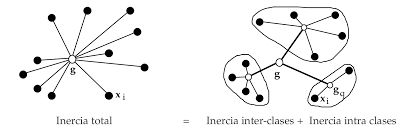
<center>

- La razón de correlación se define como el cociente entre varianza inter y varianza total.  
- La varianza total  de $F_s$ es $\lambda_s$, 
- La varianza inter con respecto a una variable $q$ es:
$$
 \sum_{j \in J_q} \frac{n_j}{n} (\overline{F}_{sj})^2
$$
 puesto que las coordenadas sobre $s$ están centradas.
donde $\overline{F}_{sj} = \sum\limits_{i \in I_{j \in J_q}} \frac{1}{n_j} F_{s}(i)$, es decir, el promedio aritmético de las coordenadas sobre el eje $s$ de los individuos que asumen la categoría $j$ de la variable $q$. 
- Por las relaciones de transición $\overline{F}_{sj} = \sqrt{\lambda_s} G_s(j)$, entonces:
$$
Varianza \ entre (q) = \lambda_s  \ \sum_{i \in J_q}  \frac{n_j}{n} G_s^2(j)
$$
y la razón de correlación es:
$$
\eta^2_s(q) = \sum_{j \in J_q} \frac{n_j}{n} G_s^2(j) 
$$
- Se puede expresar como función de la contribución absoluta de las categorías como:
$$
\eta^2_s(q) =  \lambda_s  s  \sum_{j \in q_j} Ca_s(j) 
$$
donde $J_q$ es el conjunto de categorías de la variable $q$ y $Ca_s(j)$ es la contribución absoluta de la categoría $j$ sobre el eje $s$. 
- Estos valores se encuentran en el objeto de salida de la función *dudi.acm{ade4}*, en la tabla *cr*.
- Con estas razones de correlación se pueden obtener los planos factoriales para las variables cualitativas. 
- Por ejemplo para la variable $Origen$, la suma de las contribuciones de las tres categorías sobre el primer eje es $13.45+4.87+27.18=45.5\%$, el primer valor propio es $0.3366$ y el número de variables $4$, 
- La razón de correlación es $\eta^2_1(Origen)=4*0.3366*0.455=0.613$, valor que se puede leer en la figura siguiente.


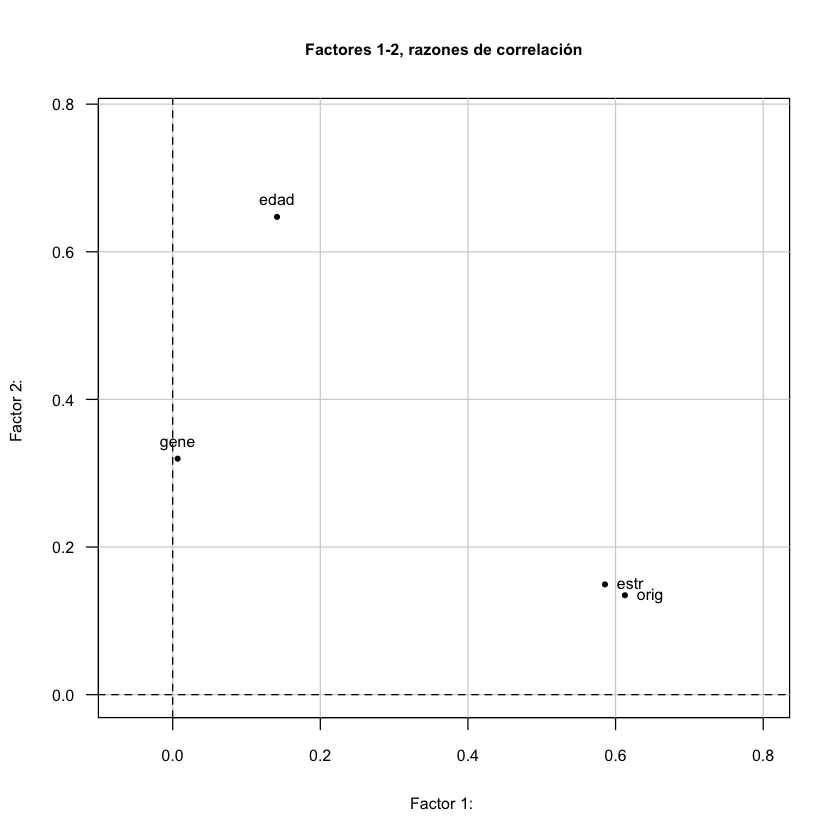

In [19]:
plotfp(acm$cr,main="Factores 1-2, razones de correlación") # función de FactoClass

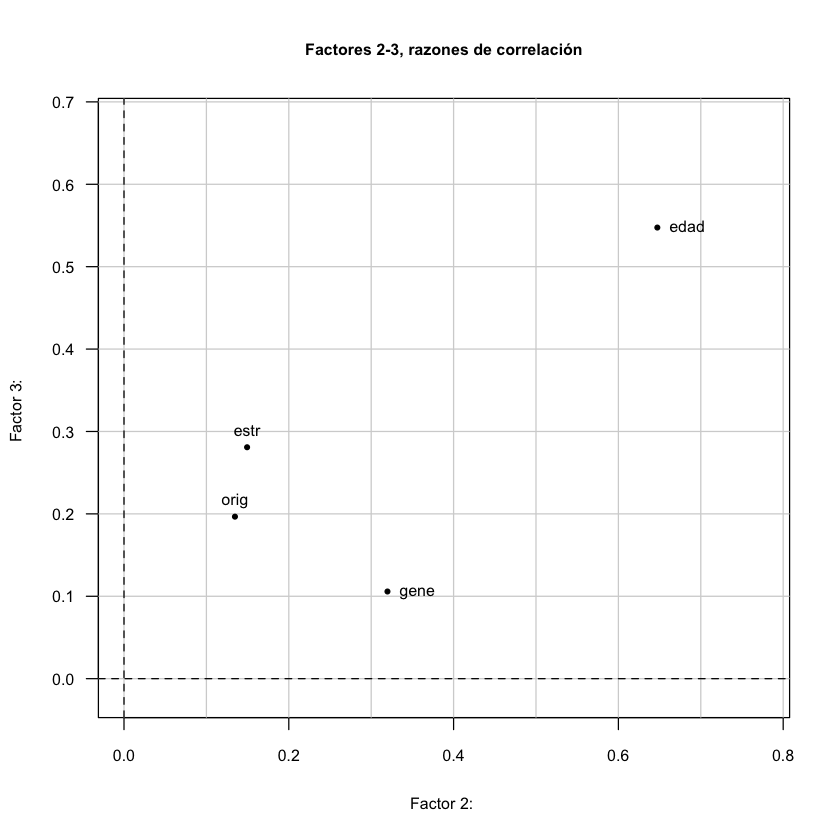

In [20]:
plotfp(acm$cr,2,3,main="Factores 2-3, razones de correlación")

[Volver al inicio](#Contenido)

# **Elementos suplementarios**

## Individuos suplementarios

- Los individuos ilustrativos se pueden proyectar utilizando la fórmula cuasibaricéntrica.
- La coordenada de un individuo suplementario es el promedio de las coordenadas de las categorías que asume, dilatado por el inverso de la raíz cuadrada del valor propio.


## Variables cualitativas suplementarias

- Las categorías  de una variable ilustrativa se proyectan mediante la fórmula cuasibaricéntrica  
 - Como el promedio de las coordenadas de los individuos que la asumen, dilatado por el inverso de la raíz cuadrada del valor propio. 
 - Se pueden calcular sus cosenos cuadrados sobre los ejes.
 - Valores test.


### Valores test para categorías suplementarias

- Una categoría $j$ es asumida por los $n_j$ individuos del conjunto $I_j$, 
- Su coordenada, sobre un eje $s$ es el promedio aritmético de las coordenadas de esos individuos  sobre el eje, multiplicada por el inverso de la raíz cuadrada del valor propio $\lambda_s$. 
- Si se supone que los $n_j$ individuos se extraen al azar de los $n$ individuos:
    - La media de las coordenadas es 0 y su varianza es $\left( \dfrac{n-n_j}{n-1} \right) \dfrac{\lambda_s}{n_j}$. 
    - La varianza de la categoría $j$ se obtiene multiplicando la varianza anterior por  $\dfrac{1}{\lambda_s}$:  
     $$\dfrac{1}{\lambda_s} \left( \dfrac{n-n_j}{n-1} \right) \dfrac{\lambda_s}{n_j} =  \dfrac{n-n_j}{n(n-1)} $$
    - El valor calculado de la estadística $T$ para la verdadera coordenada es:
    $$
    t_s(j) = \sqrt{\dfrac{n_j(n-1)}{n-n_j}} G_s(j)
    $$

[Volver al inicio](#Contenido)

#### Ejemplo: alor test para *Química* sobre el primer eje:

In [21]:
# Número de admitidos por carreras:
t(data.frame(nCarr=summary(admi$carr)))
# Valor test:
vtQui = sqrt(63*(445-1)/(445-63))*(-0.259)
cat("Valor test de química:",round(vtQui,3))


,Biol,Esta,Farm,Fisi,Geol,Mate,Quim
nCarr,63,66,73,82,45,53,63


Valor test de química: -2.216

- La diferencia con el valor de la salida se debe al número de cifras significativas. 
- Este valor, menor que -2, indica que es válido leer la posición negativa  de Química sobre el primer eje, lo que significa que está asociada con estrato bajo y origen fuera de Bogotá.


 #### Carreras sobre el primer plano factorial del ACM de admitidos

In [22]:
supCarr<-supqual(acm,admi$carr)

In [23]:
attach(supCarr)
cat("\nCoordenadas y ayudas para la interpretación")
cbind(ncat,round(cbind(dis2,coor,tv,cos2),3))
cat("\nRazones de correlación\n")
round(scr*100,2)
detach(supCarr)


Coordenadas y ayudas para la interpretación

,ncat,dis2,Axis1,Axis2,Axis3,Axis1,Axis2,Axis3,Axis1,Axis2,Axis3
qual.Biol,63,6.063,-0.018,0.146,0.068,-0.156,1.245,0.579,0.000,0.003,0.001
qual.Esta,66,5.742,0.029,-0.104,0.018,0.255,-0.912,0.160,0.000,0.002,0.000
qual.Farm,73,5.096,0.168,0.198,-0.392,1.566,1.845,-3.664,0.006,0.008,0.030
qual.Fisi,82,4.427,0.095,-0.029,0.127,0.948,-0.292,1.267,0.002,0.000,0.004
qual.Geol,45,8.889,-0.040,0.076,0.635,-0.284,0.540,4.490,0.000,0.001,0.045
qual.Mate,53,7.396,-0.050,-0.462,-0.112,-0.387,-3.579,-0.869,0.000,0.029,0.002
qual.Quim,63,6.063,-0.259,0.106,-0.156,-2.217,0.907,-1.335,0.011,0.002,0.004



Razones de correlación


,Axis1,Axis2,Axis3
qual,1.64,3.88,7.47


- Sólo es legítimo interpretar como diferente de cero las coordenadas de: 
- Química (-) sobre el primer eje, Matemáticas (+) sobre el segundo eje; y Geología (-) opuesto a Farmacia (+) sobre el tercer eje.  
 - Química  tiene, en comparación al promedio, mayor proporción de admitidos de  estrato bajo y origen fuera de Bogotá,
 - Matemáticas  de 19 o más años, 
 - Geología de 17 años y de estrato alto,  
 - Farmacia de 18 años y género femenino. 


#### Proyección de las carreras sobre el primer plano factorial

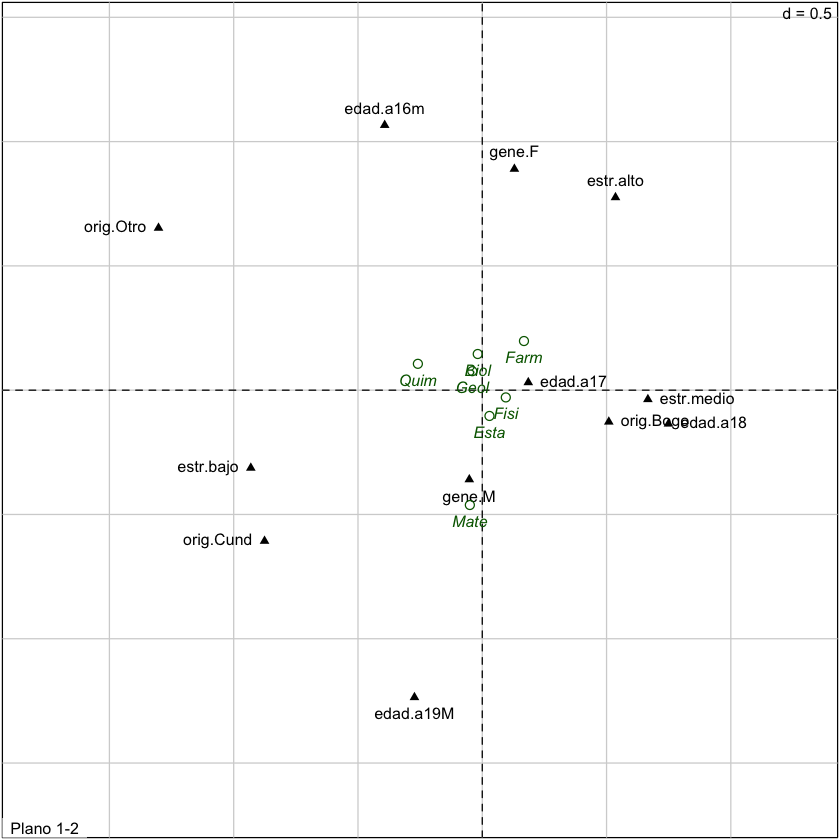

In [24]:
plot(acm,Trow =FALSE,infaxes="no",main="Plano 1-2",
ylim =c( -1.5 ,1.3) , col.col=" black ")
points( supCarr$coor ,col ="darkgreen")
text(supCarr$coor , labels = attributes (admi[,1])$levels ,
col ="darkgreen",pos =1, cex =0.8 , font =3)

#### Proyección de las carreras sobre el plano factorial 2-3

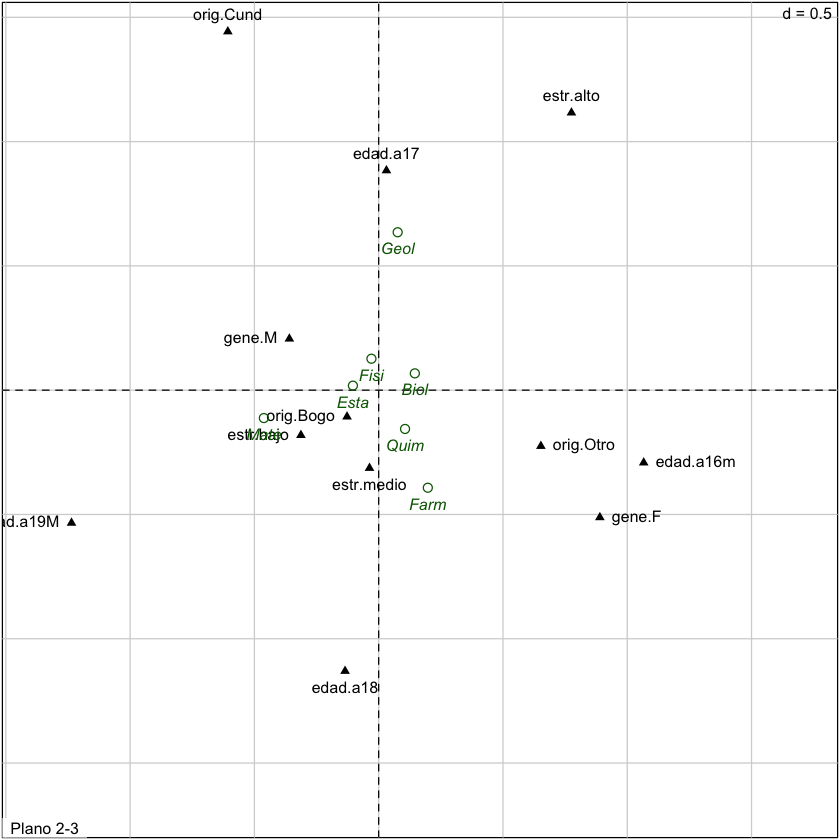

In [25]:
plot(acm,2,3,Trow =FALSE,infaxes="no",main="Plano 2-3",
ylim =c( -1.5 ,1.3) , col.col=" black ")
points(supCarr$coor[,c(2,3)] ,col ="darkgreen")
text(supCarr$coor[,c(2,3)] , labels = attributes (admi[,1])$levels ,
col ="darkgreen",pos =1, cex =0.8 , font =3)

#### Retorno a los datos
Perfiles fila de las carreras según las variables activas, para corroborar lo que se ve en los planos factoriales

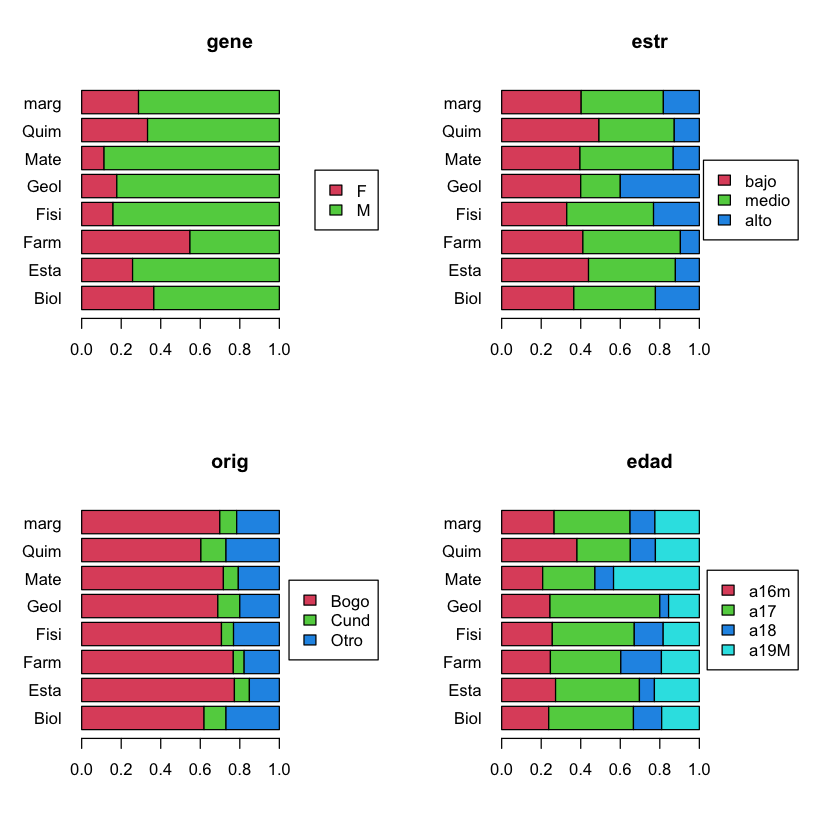

In [26]:
par(mfrow=c(2,2))
for (varac in 8:11){
    K<-unclass(table(admi$carr,admi[,varac]))
    plotct(K,"row",col=2:5,main=colnames(admi)[varac])
}

- Química  tiene, en comparación al promedio, mayor proporción de admitidos de  estrato bajo y origen fuera de Bogotá,
- Matemáticas tiene mayor proporción de admitidos de 19 o más años, 
- Geología tiene mayor proporción de admitidos de 17 años y de estrato alto,  
- Farmacia tiene mayor proporción de admitidos de 18 años y género femenino. 


Para más detalles del ACM y un ejemplo de aplicación ver el capítulo 6 del libro [EDM.](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi6qZDBjtDzAhVeRTABHYZPBWEQFnoECAYQAQ&url=http%3A%2F%2Fciencias.bogota.unal.edu.co%2Ffileadmin%2FFacultad_de_Ciencias%2FPublicaciones%2FImagenes%2FPortadas_Libros%2FEstadistica%2FEstadistica_descriptiva_multivariada%2FlibroEstadisiticaDescriptivaMultivariadaDigital.pdf&usg=AOvVaw2Q7b-e89FbWXFda5h4sCuf)

[Volver al inicio](#Contenido)

# Ejemplo de aplicación: ACM de consumo cultural entre  niños  de 8 a 11 años en Colombia

Se presenta un ejemplo de análisis parcial de la Encuesta de Consumo Cultural 2014 (Dane).  La encuesta aplica un formulario a una subpoblación de niños de 5 a 11 años, sobre consumo cultural.  Se adicionan algunas variables sociodemográficas de los módulos de hogares y viviendas. Para este análisis, se seleccionan los niños  que tienen edades entre 8 y 11 años y que saben leer. 


## Objetivos del análisis

Describir el consumo cultural de niños entre 8 y 11 años, que saben leer y explorar su relación con algunas variables sociodemográficas.


## Datos

Para este ejemplo se toman las siguientes preguntas del tema de consumo cultural:

- Teat: ¿El niño o la niña asistió a teatro, danza u ópera en los últimos doce meses?	¿Con qué frecuencia?
- Libr: ¿En los últimos doce meses el niño o la niña leyó libros y con qué frecuencia?
- Cine: ¿En los últimos doce meses el niño o la niña fue a cine y con qué frecuencia?
- Vide: ¿El niño o la niña vio videos en el último mes y con qué frecuencia?
- Radi: ¿En la última semana el niño o la niña escuchó radio y con qué frecuencia?
- Musi: ¿El niño o la niña escuchó música grabada en la última semana y con qué frecuencia?

La tabla activa construida para este análisis tiene 1971 niños de todo el país y seis variables cualitativas sobre consumo cultural.

El formulario de la encuesta tiene dos preguntas para cada actividad: la primera, si se ha realizado, y la segunda, su frecuencia. Las respuestas a las dos preguntas en cada actividad, se recodificaron en una sola y se incluyó la categoría no como otro ítem de frecuencia. Adicionalmente se unieron algunas categorías de  muy baja frecuencia. 

Las distribuciones de frecuencias de las variables se muestran en forma de tortas en la figura donde se pueden ver sus categorías. Se tienen entonces $s=6$ variables activas con un total de $p=31$ categorías.


In [27]:
rm(list=ls())
# Lectura de los datos, están en formato R
load("../Datos/ninios8a11.rda")
# variables activas
Y <- subset(ninios8a11,select=c(Teat,Libr,Cine,Vide,Radi,Musi))
# variables suplementarias
Ys<-ninios8a11[,c(2,29,30,32,35)]

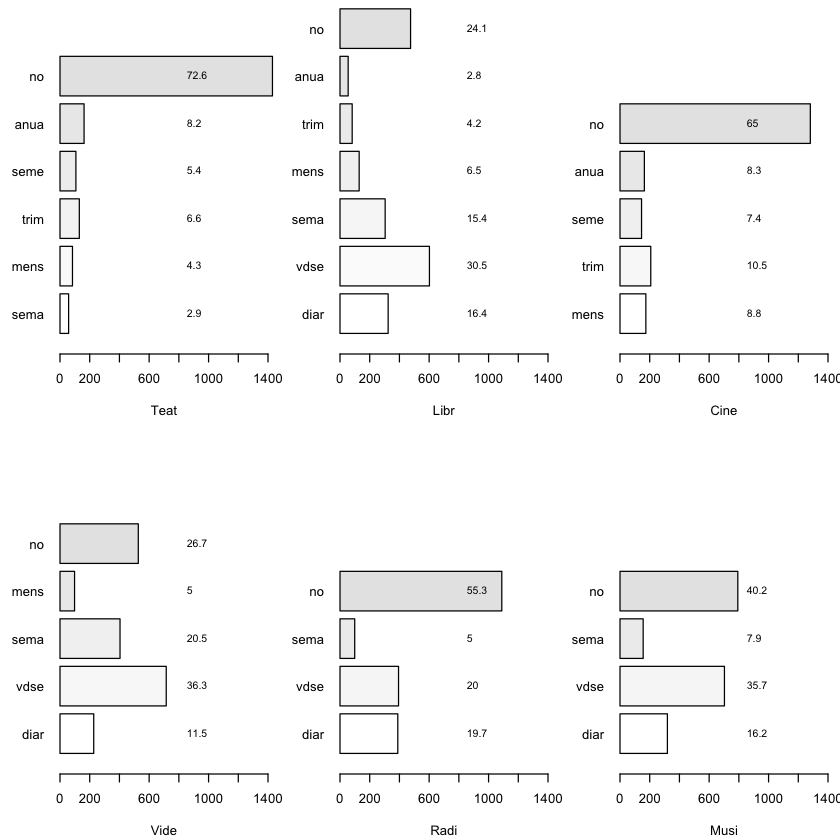

In [28]:
par(las=1,mfrow=c(2,3),mai=c(0.55,0.5,0.1,0.1))
for(i in 1:6){
  cat<-attributes(Y[,i])$levels;
  per<-tabulate(Y[,i])/nrow(Y)*100;
  pl<-plot(Y[,i],horiz=TRUE,col=gray(seq(1.0,0.9,
           length=length(cat))),ylim=c(0,8),
           xlim=c(0,1400),xlab=colnames(Y)[i]);
  text(800,pl,round(per,1),cex=0.8,pos=4); 
  }  


Las variables ilustrativas se muestran en la figura junto con las distribuciones de frecuencias. Las variables estrato y parentesco, se recodificaron a menos categorías, dada la presencia de frecuencias muy bajas en algunas de ellas.

**Corrección de edad:** la variable *Edad* es cualitativa (categórica), y tiene tres categorías sin frecuencias, vamos a eliminarlas así: 

In [29]:
table(Ys$Edad) #para ver las frecuencias como venían
Ys$Edad=factor(as.numeric(Ys$Edad),labels=paste("a",8:11,sep=""))
table(Ys$Edad) #ver las frecuencias como quedaron              


 a5  a6  a7  a8  a9 a10 a11 
  0   0   0 467 474 510 520 


 a8  a9 a10 a11 
467 474 510 520 

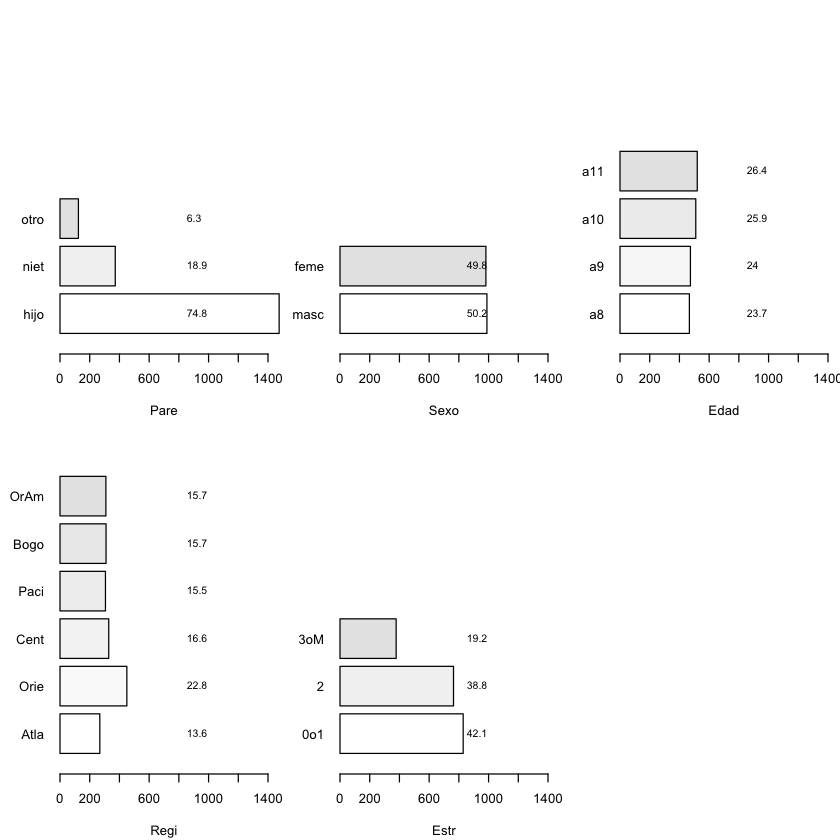

In [30]:

par(las=1,mfrow=c(2,3),mai=c(0.55,0.5,0.1,0.1))
for(i in 1:5){
  cat<-attributes(Ys[,i])$levels;
  per<-tabulate(Ys[,i])/nrow(Y)*100;
  pl<-plot(Ys[,i],horiz=TRUE,col=gray(seq(1.0,0.9,
           length=length(cat))),ylim=c(0,8),
           xlim=c(0,1400),xlab=colnames(Ys)[i]);
  text(800,pl,round(per,1),cex=0.8,pos=4); 
}  


[Volver al inicio](#Contenido)

## Resultados del análisis
Para realizar el ACM se usa la función *dudi.acm{ade4}*; las ayudas para la interpretación se obtienen con *inertia.dudi{ade4}*; las coordenadas y ayudas para la interpretación de las variables cualitativas ilustrativas, con 
*supqual{FactoClass}*; los planos factoriales, con  *plot.dudi{FactoClass}* para las variables activas   
y  *plotfp{FactoClass}* para los planos factoriales cuando se desean solo las variables cualitativas ilustrativas. 

### Número de ejes a interpretar
La primera decisión a tomar es el número de ejes a interpretar. No hay recetas pero sí criterios que ayudan a tomar esta decisión. La guía principal es la forma del histograma de valores propios. 

- Los ejes que sobresalen claramente, antes de ver una forma de $S$ regular del histograma serían los ejes a analizar. 

- El criterio de Benzécri, que utiliza un histograma de una transformación de los valores propios, considerando los que son superiores a $1/s$,  también ayuda. 

- Finalmente, en concordancia con los objetivos, se debe interpretar un eje adicional si provee información relevante que no se ha obtenido con los ejes anteriores.

Para el ejemplo se muestran en la figura  los histogramas de valores propios y del criterio de Benzécri, los valores propios y porcentajes de inercia. Los gráficos sugieren analizar tres ejes. 

El criterio de Benzécri se construye considerando los 11 valores propios, que tienen un valor superior a $1/6= 0.1667$. Los tres primeros ejes retienen el 17.8\% de la inercia, pero en el ACM este es un índice pesimista. 

En el criterio de Benzècri se retiene un 81.8% de la variabilidad ajustada, pues el criterio considera que 25 - 11 = 14 ejes son "parásitos", es decir, no suministran información. El bajo porcentaje de inercia retenida en los ejes, hace que el analista tenga que ser menos exigente en las calidades de las representaciones.

In [31]:
acm<-dudi.acm(Y,scannf = FALSE,nf=3)
eigtab<-data.frame(valp=acm$eig,porc=acm$eig/sum(acm$eig)*100,
                   pacu=cumsum(acm$eig)/sum(acm$eig)*100)
cbind(eje=1:8,round(eigtab[1:8,],4),eje=9:16,round(eigtab[9:16,],4),
       eje=17:24,round(eigtab[17:24,],4))
#      ,digits=c(0,rep(c(0,3,1,1),3)))
# criterio de Benzecri
s<-6; cat("\n1/s:",round(1/s,4)) 
# --> se calcula tau para los primeros 11 ejes
eig11<-acm$eig[1:11]
tau<-(s/(s-1))^2*(eig11-(1/s))^2
ptau<-tau/sum(tau)*100

,eje,valp,porc,pacu,eje,valp,porc,pacu,eje,valp,porc,pacu
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,0.3007,7.2158,7.2158,9,0.1715,4.1160,44.0120,17,0.1513,3.6310,74.8790
2,2,0.2323,5.5752,12.7910,10,0.1689,4.0527,48.0648,18,0.1442,3.4608,78.3399
3,3,0.2089,5.0141,17.8051,11,0.1680,4.0324,52.0971,19,0.1432,3.4360,81.7758
4,4,0.1952,4.6838,22.4889,12,0.1648,3.9556,56.0527,20,0.1402,3.3651,85.1409
5,5,0.1879,4.5105,26.9994,13,0.1609,3.8612,59.9139,21,0.1350,3.2407,88.3816
6,6,0.1809,4.3422,31.3416,14,0.1589,3.8127,63.7266,22,0.1315,3.1566,91.5382
7,7,0.1804,4.3292,35.6708,15,0.1584,3.8006,67.5273,23,0.1292,3.1017,94.6399
8,8,0.1761,4.2253,39.8961,16,0.1550,3.7207,71.2480,24,0.1213,2.9106,97.5504



1/s: 0.1667

### Histograma de valores propios


Altura linea verde = 1/s

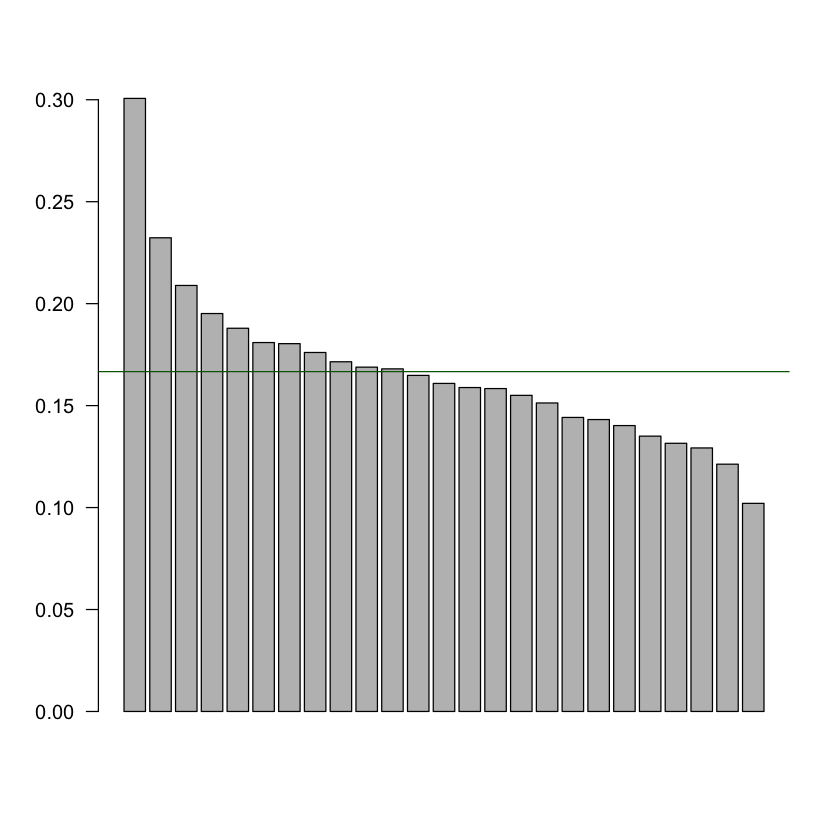

In [32]:
barplot(acm$eig,las=2)
abline(h=1/s,col="darkgreen")
cat("\nAltura linea verde = 1/s")

### Criterio de Benzècri


Altura linea azul = promedio de los taus

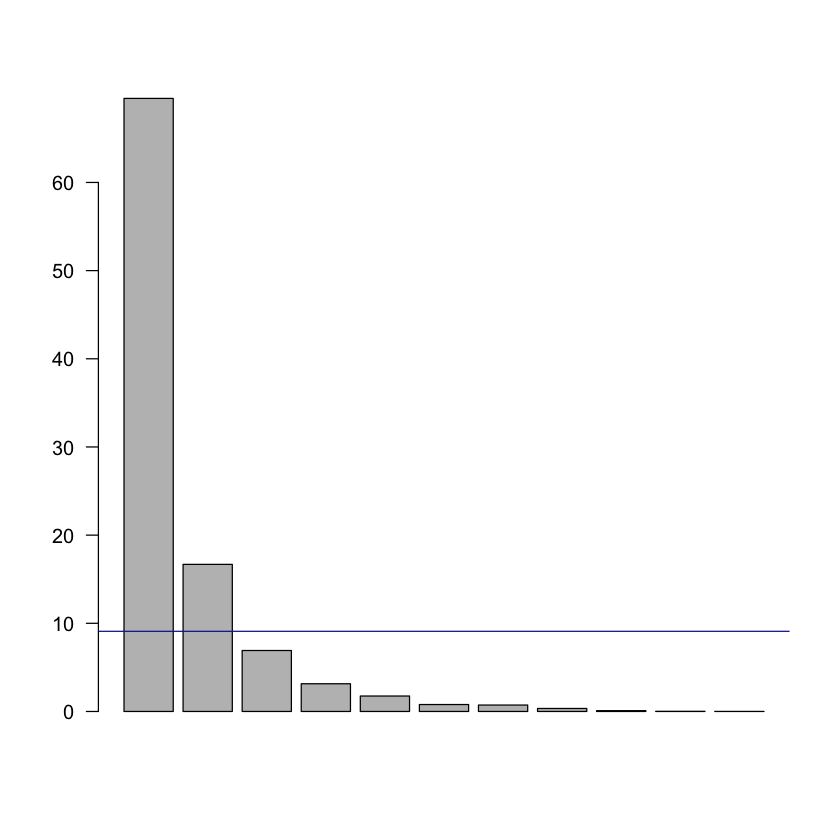

In [33]:
barplot(ptau,las=2)
abline(h=sum(ptau)/11,col="blue")
cat("\nAltura linea azul = promedio de los taus")

[Volver al inicio](#Contenido)

### Primer plano factorial del ACM de frecuencia de lectura de niños, mostrando las categorías activas

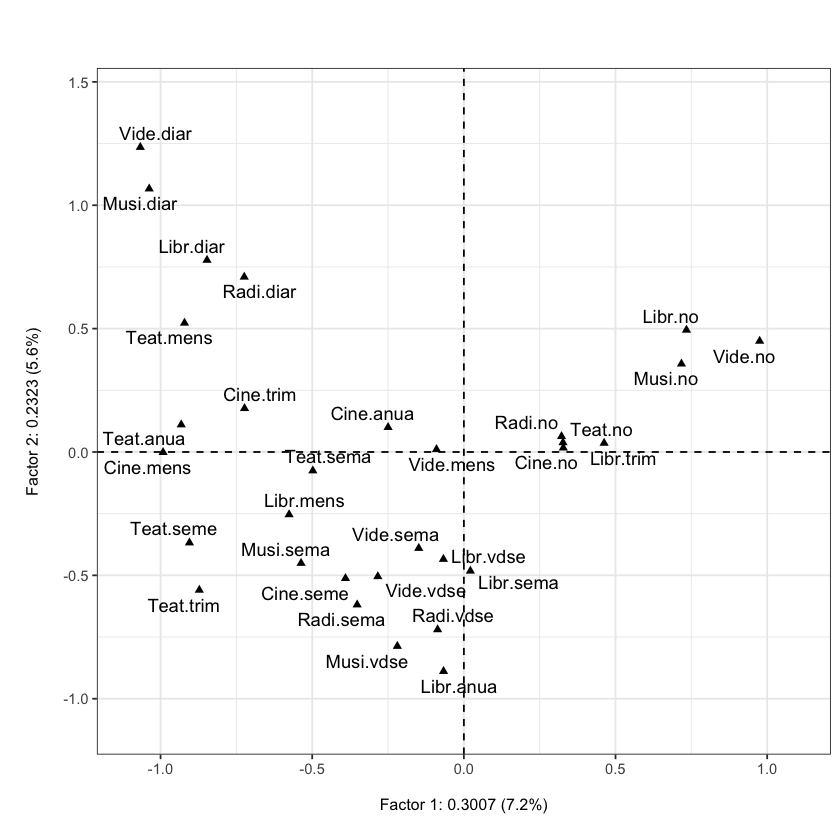

In [34]:
plot(acm,Trow=FALSE,gg=TRUE,xlim=c(-1,1),ylim=c(-1,1.3),cframe=1.1,col.col="black",cex.global=0.8)

#### Primer eje factorial

Para observar simultáneamente, las oposiciones de las categorías en el eje se incluye el signo de la coordenada (aquí está entre paréntesis). 
El primer eje factorial contrapone: ir a teatro al menos una vez al año (-) contra no ir (+),  leer libros diariamente (-) contra  no leer (+), ir a cine mensualmente (-) contra no ir (+), ver videos diariamente (-), contra no ver (+), escuchar radio diariamente (-) contra no escuchar (+) y  escuchar música grabada diariamente (-)  contra no escuchar (+).  Es decir, separa a los niños de mayor consumo cultural, al lado negativo, de los que no tiene consumo cultural, al lado positivo. Entonces el primer eje es un indicador de consumo cultural y ordena a los niños: al lado negativo los que más consumen, al lado positivo los que no consumen.


#### Segundo eje factorial

El segundo eje contrapone valores medios contra valores extremos en algunas variables, lo que indica que hay presencia de efecto Guttman:  leer varias veces a la semana contra no leer o hacerlo diariamente, ver videos varias veces a la semana contra no ver o hacerlo  diariamente, escuchar radio  varios días a la semana contra hacerlo diariamente y escuchar música grabada varios días a la semana contra escucharla diariamente o no hacerlo.  


### Tercer eje factorial

El tercer eje separa algunas categorías intermedias:  ver videos varios días a la semana  contra hacerlo semanal o mensualmente,  escuchar radio varias veces a la semana contra hacerlo semanalmente; y  escuchar música grabada varios días a la semana contra semanalmente.  

Aunque el tercer eje permite ver algunas diferencias, mejor que en los dos primeros ejes, se puede prescindir de este en una síntesis del consumo cultural de los niños.


### Primer plano factorial
  Se observa claramente el efecto Gutttman (forma de parábola en las variables ordinales) en todas las variables, es decir, las categorías están ordenadas: arriba a la derecha están las que indican que no hay consumo; a medida que se desciende en dirección a la izquierda, el consumo cultural va aumentando; luego arriba a la izquierda se ubican las categorías de mayor consumo cultural. 
  
Como las categorías se ubican en el promedio de las coordenadas de los niños que las asumen (alejado por el inverso de la raíz del valor propio), los niños quedan ordenados de la misma forma, según su consumo cultural.   

In [35]:
ayu<-inertia.dudi(acm,,T) 
cat("\ncategoría | peso  |    coordenadas        |     cont.absoluta   |  coseno cuadrado")
round(cbind(peso=acm$cw,acm$co,ayu$col.abs/100,abs(ayu$col.rel)/100),4)


categoría | peso  |    coordenadas        |     cont.absoluta   |  coseno cuadrado

,peso,Comp1,Comp2,Comp3,Axis1,Axis2,Axis3,Axis1,Axis2,Axis3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Teat.sema,0.0049,-0.4980,-0.0758,-0.3073,0.0040,0.0001,0.0022,0.0075,0.0002,0.0029
Teat.mens,0.0071,-0.9211,0.5228,0.2842,0.0200,0.0084,0.0027,0.0378,0.0122,0.0036
Teat.trim,0.0110,-0.8722,-0.5595,-0.2800,0.0278,0.0148,0.0041,0.0537,0.0221,0.0055
Teat.seme,0.0090,-0.9047,-0.3679,-0.5120,0.0246,0.0053,0.0114,0.0470,0.0078,0.0150
Teat.anua,0.0137,-0.9318,0.1107,0.0765,0.0396,0.0007,0.0004,0.0778,0.0011,0.0005
Teat.no,0.1209,0.3269,0.0382,0.0509,0.0430,0.0008,0.0015,0.2824,0.0039,0.0068
Libr.diar,0.0274,-0.8469,0.7776,-0.1125,0.0654,0.0713,0.0017,0.1411,0.1190,0.0025
Libr.vdse,0.0509,-0.0674,-0.4345,0.3652,0.0008,0.0414,0.0325,0.0020,0.0830,0.0587
Libr.sema,0.0257,0.0215,-0.4822,-0.3068,0.0000,0.0257,0.0116,0.0001,0.0424,0.0172


[Volver al inicio](#Contenido)

### Variables suplementarias

En la figura se muestran las categorías de las variables sociodemográficas, proyectadas como suplementarias en el primer plano factorial y las coordenadas y ayudas para la interpretación sobre los tres primeros ejes factoriales. 
El plano debe verse como un *zoom* del centro de la figura. 

#### Proyección de categorías suplementarias sobre el primer plano factorial del ACM de consumo cultural 

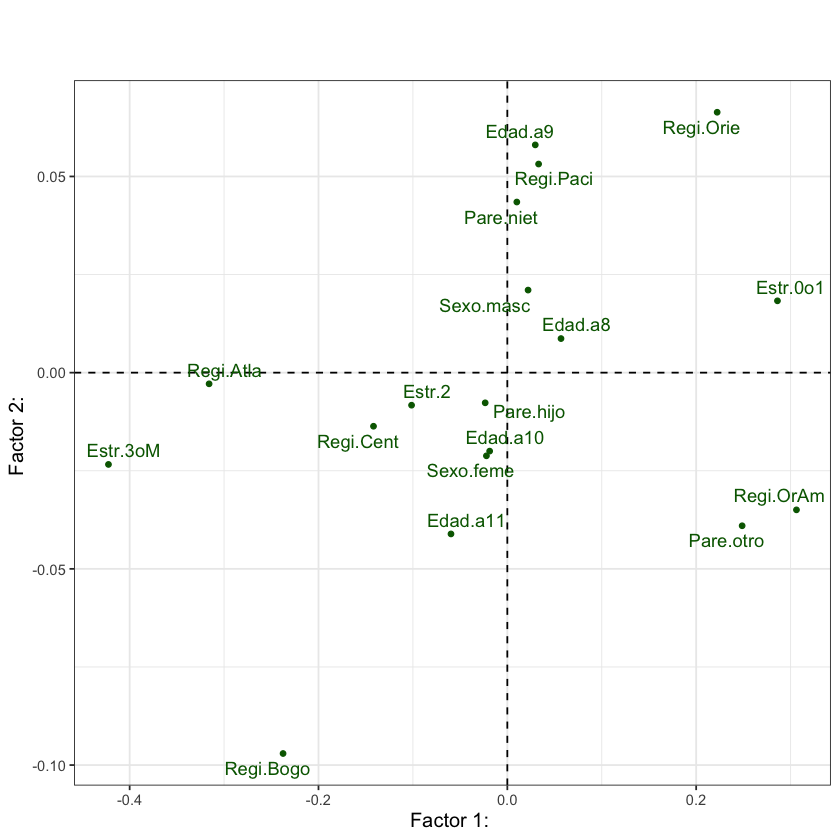

In [39]:
sc<-supqual(acm,Ys)
plotfp(as.data.frame(sc$coor),col="darkgreen",cframe=1,gg=TRUE)


Las categorías que tienen valores test inferiores a -2 y superiores a 2,  son las que se pueden interpretar. Solo es pertinente interpretar el primer eje (horizontal) del plano factorial. 

Entonces, las diferencias  del consumo cultural se pueden explicar en parte por el nivel socioeconómico (el estrato es una aproximación): el consumo cultural aumenta a medida que mejora el nivel socioeconómico. 
Pero también por el parentesco con el jefe del hogar: los niños que viven con personas diferentes a los padres o abuelos tienen menor consumo cultural, y  por la región geográfica donde viven: los niños de las regiones Atlántica, Bogotá y Central suelen tener mayor consumo cultural que los de las regiones Orinoquía-Amazonía y Oriental.


#### Coordenadas y ayudas para la interpretación de las categorías suplementarias del ACM de consumo cultural

In [41]:
round(data.frame(por=sc$ncat/34.76,dis2=sc$dis2,coor=sc$coor,vt=sc$tv,cos2=sc$cos2),4)

,por,dis2,coor.Axis1,coor.Axis2,coor.Axis3,vt.Axis1,vt.Axis2,vt.Axis3,cos2.Axis1,cos2.Axis2,cos2.Axis3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pare.hijo,42.4338,0.3363,-0.0234,-0.0077,0.0313,-1.7942,-0.5884,2.3943,0.0016,0.0002,0.0029
Pare.niet,10.7020,4.2984,0.0100,0.0435,-0.0882,0.2151,0.9309,-1.8874,0.0000,0.0004,0.0018
Pare.otro,3.5673,14.8952,0.2487,-0.0390,-0.1076,2.8600,-0.4487,-1.2376,0.0042,0.0001,0.0008
Sexo.masc,28.4522,0.9929,0.0220,0.0210,0.0190,0.9791,0.9374,0.8459,0.0005,0.0004,0.0004
Sexo.feme,28.2509,1.0071,-0.0221,-0.0212,-0.0191,-0.9791,-0.9374,-0.8459,0.0005,0.0004,0.0004
Edad.a8,13.4350,3.2206,0.0568,0.0087,-0.0218,1.4060,0.2148,-0.5387,0.0010,0.0000,0.0001
Edad.a9,13.6364,3.1582,0.0296,0.0580,-0.0253,0.7392,1.4496,-0.6320,0.0003,0.0011,0.0002
Edad.a10,14.6720,2.8647,-0.0187,-0.0200,0.0473,-0.4908,-0.5243,1.2406,0.0001,0.0001,0.0008
Edad.a11,14.9597,2.7904,-0.0597,-0.0411,-0.0038,-1.5857,-1.0920,-0.1003,0.0013,0.0006,0.0000


### Relación entre variables y ejes


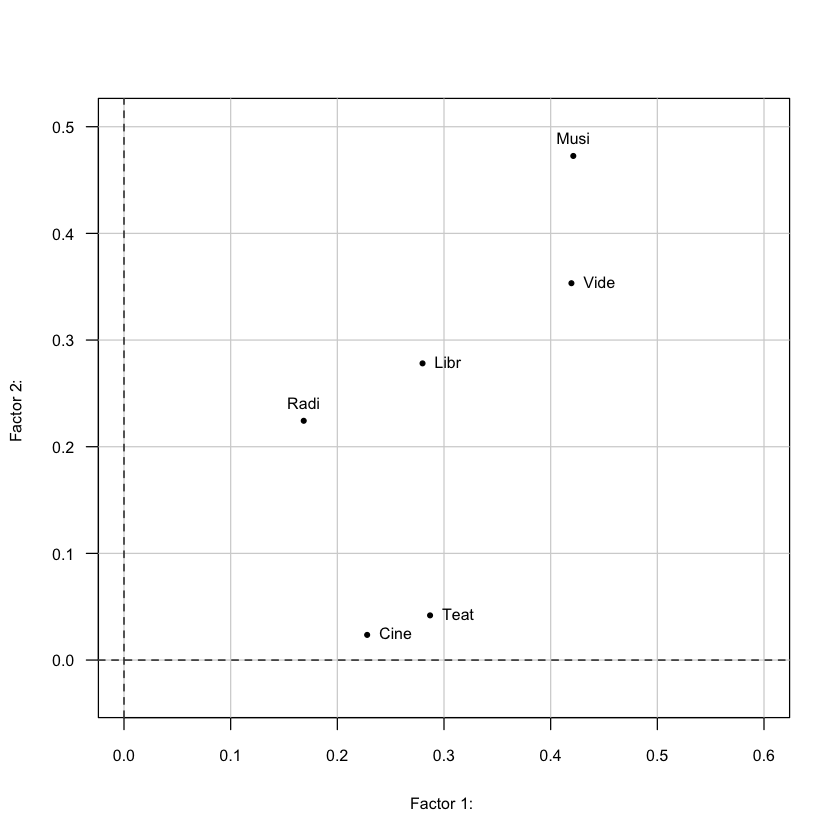

In [38]:
plotfp(acm$cr,xlim=c(0,0.6),cframe=1)

### Conclusiones del  análisis ACM de frecuencias de lectura de niños

- Los niños entre 8 y 11 años de la muestra del Dane14 tienen un bajo consumo cultural: menos de la mitad asisten a teatro, cine o escuchan radio; casi la cuarta parte dice no leer libros. .

- Las categorías se ordenan en el primer plano factorial, en forma de parábola, lo que muestra la tendencia general de que los niños que tienen bajo consumo cultural, lo tienen simultáneamente en las seis actividades. Entonces, el primer plano factorial es un indicador del consumo cultural y se pueden vislumbrar grupos de niños: los ubicados arriba a la izquierda son los de mayor consumo y los de arriba a la derecha los de menor consumo. En el centro del plano hacia abajo se ubican los de consumo medio.

- Si se desea ordenar a los niños por su consumo cultural, se pueden utilizar las coordenadas del primer eje, pues este es también un indicador de consumo cultural.

- El nivel de consumo cultural está explicado en parte, por el nivel socioeconómico (aproximado con el estrato), la relación con el jefe del hogar y la región donde viven los niños.  Los niños suelen tener más consumo cultural a mayor nivel socioeconómica o si viven con padres o abuelos y si son de las regiones Atlántica, Bogotá o Central.


# FIN

[Volver al inicio](#Contenido)